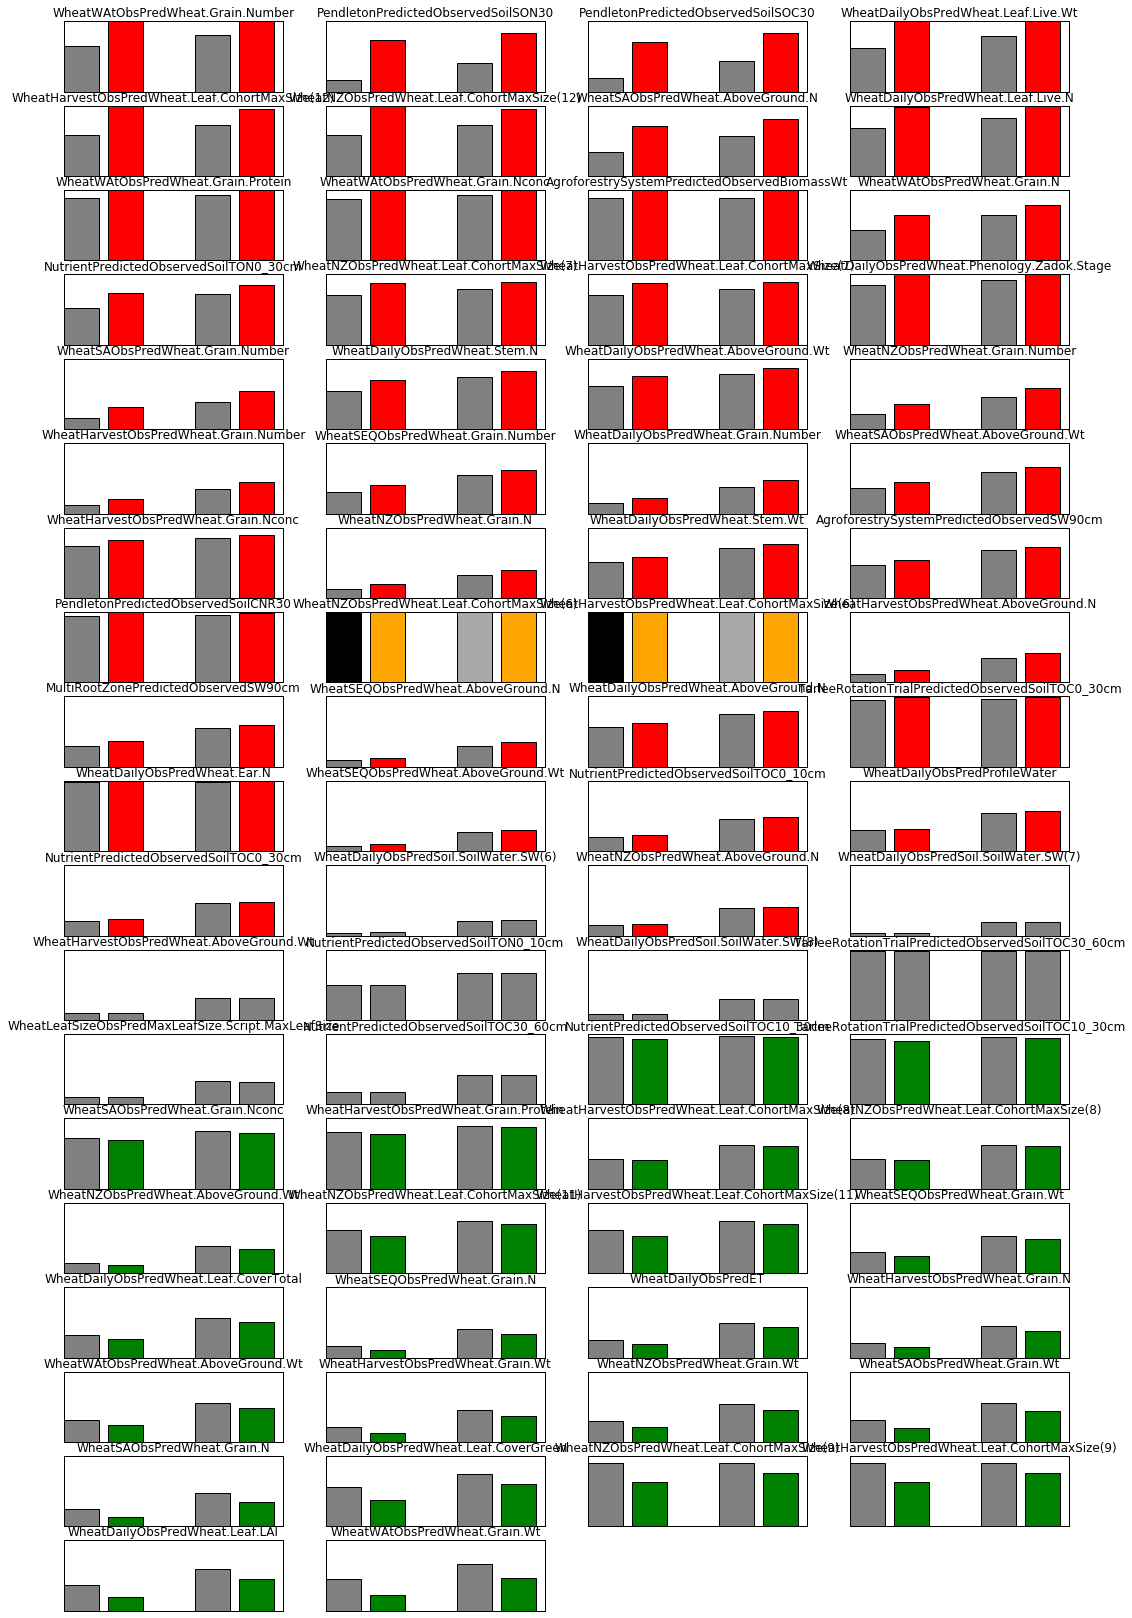

In [198]:
















































#Bring in libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Get data
StatsTable = pd.read_excel('StatsTableEG.xlsx')

#extract the the statistics that are within specified thresholds
JunkStatsFilter = (((StatsTable.TestStat == 'NSE') & (StatsTable.Accepted > 0)) | ((StatsTable.TestStat == 'RSR') & (StatsTable.Accepted < 1)))
EvalStats = StatsTable.loc[JunkStatsFilter,['Model','POTable','Variable','TestStat','Accepted','Current']]
EvalStats.loc[:,'Index'] = EvalStats.loc[:,'Model'] + EvalStats.loc[:,'POTable'] + EvalStats.loc[:,'Variable']
EvalStats.set_index('Index',inplace=True)
NSEFilter = EvalStats.TestStat == 'NSE'
RSRFilter = EvalStats.TestStat == 'RSR'

#Invert NSE so it has the same visual interpretation as the other stats 0 = optimal, bigger = bad
EvalStats.loc[NSEFilter,'Accepted'] = 1-EvalStats.loc[NSEFilter,'Accepted']
EvalStats.loc[NSEFilter,'Current'] = 1-EvalStats.loc[NSEFilter,'Current']

#Calculate changes
EvalStats.loc[:,'Change'] = EvalStats.loc[:,'Accepted'] - EvalStats.loc[:,'Current'] 

#Make a list of each of the sets of stats we have and rank it from most changed to least
StatsGroups = list(EvalStats.index.drop_duplicates())
LargestDegrad = EvalStats.loc[:,'Change'].groupby(level='Index').min()
LargestDegrad.sort_values(inplace=True)
RankedList = LargestDegrad.index

#Produce a graph of stats
Tolerence = 0.01
Graph = plt.figure(figsize=(18,30))
pos = 1
for Test in RankedList:
    Fig = Graph.add_subplot(20,4,pos)
    Stats = EvalStats.loc[Test,:]
    #Stats.set_index('TestStat',inplace=True)
    try:
        plt.bar(1,Stats.loc[Stats.TestStat=='NSE','Accepted'],color='grey')
    except:
        plt.bar(1,1,color='black')
    try:
        barcol = 'grey'
        if Stats.loc[Stats.TestStat=='NSE','Change'][0] < -Tolerence:
            barcol = 'red'
        if Stats.loc[Stats.TestStat=='NSE','Change'][0] > Tolerence:
            barcol = 'green'
        plt.bar(2,Stats.loc[Stats.TestStat=='NSE','Current'],color=barcol)
    except:
        plt.bar(2,1,color='orange')
    try:
        plt.bar(4,Stats.loc[Stats.TestStat=='RSR','Accepted'],color='grey')
    except:
        plt.bar(4,1,color='darkgrey')
    try:
        barcol = 'grey'
        if Stats.loc[Stats.TestStat=='NSE','Change'][0] < -Tolerence:
            barcol = 'red'
        if Stats.loc[Stats.TestStat=='NSE','Change'][0] > Tolerence:
            barcol = 'green'
        plt.bar(5,Stats.loc[Stats.TestStat=='RSR','Current'],color=barcol)
    except:
        plt.bar(5,1,color='orange')
    plt.ylim(0,1)
    plt.title(Test)
    plt.tick_params(axis='y',which='both',left='off',right='off',labelleft='off')
    plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    pos +=1